# Estimation of TTC-PD model
-Estimate a Lifetime TTC model over 10 years using a homogeneous time Markov chain approach and yearly migration matrix < Migration Matrix > 

-Describe your observations, in particular if and why the estimated PD vectors suitable for modelling.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "C:\\Users\\Study\\Downloads\\CaseStudyData_2024.xlsx"
sheet_name = 'Migration Matrix'

transition_matrix = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl', header=1, index_col=0)

transition_matrix = transition_matrix[['AAA','AA','A','BBB','BB','B','CCC','D']]
transition_matrix.columns = ['AAA','AA','A','BBB','BB','B','CCC','D']
transition_matrix.head(8)

,AAA,AA,A,BBB,BB,B,CCC,D
AAA,0.8726,0.0894,0.0051,0.0003,0.0010,0.0003,0.0005,0.0308
AA,0.0046,0.8763,0.0757,0.0045,0.0005,0.0006,0.0002,0.0378
A,0.0002,0.0150,0.8921,0.0472,0.0024,0.0010,0.0001,0.0419
BBB,0.0000,0.0007,0.0308,0.8713,0.0328,0.0041,0.0009,0.0594
BB,0.0001,0.0002,0.0010,0.0446,0.7859,0.0640,0.0051,0.0990
B,0.0000,0.0002,0.0006,0.0015,0.0446,0.7503,0.0485,0.1544
CCC,0.0000,0.0000,0.0008,0.0014,0.0043,0.1334,0.4495,0.4106
D,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [4]:
years = 10
states = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'D']
pd_yearly = pd.DataFrame(index=range(1, years + 1), columns=states)

for year in range(1, years + 1):
    # Raising the transition matrix to the power of `year`
    matrix_power = np.linalg.matrix_power(transition_matrix, year)
    # Extracting the probability of default (last column) for all grades
    pd_yearly.loc[year] = matrix_power[:, -1]

# Converting to numeric
pd_yearly = pd_yearly.astype(float)
pd_yearly.index.name = "Year"

# Results
pd_yearly

,AAA,AA,A,BBB,BB,B,CCC,D
Year,,,,,,,,
1,0.030800,0.037800,0.041900,0.059400,0.099000,0.154400,0.410600,1.0
2,0.061638,0.074729,0.083089,0.116722,0.191482,0.294698,0.616304,1.0
3,0.092313,0.110780,0.123482,0.171755,0.276799,0.414182,0.727995,1.0
4,0.122702,0.145954,0.162997,0.224363,0.354572,0.513168,0.794615,1.0
5,0.152722,0.180256,0.201557,0.274459,0.424764,0.594246,0.838205,1.0
6,0.182313,0.213691,0.239095,0.321993,0.487623,0.660429,0.869018,1.0
7,0.211426,0.246258,0.275554,0.366951,0.543583,0.714484,0.892063,1.0
8,0.240026,0.277958,0.310886,0.409345,0.593190,0.758752,0.909966,1.0
9,0.268080,0.308789,0.345054,0.449219,0.637037,0.795137,0.924220,1.0


In [8]:
P_10 = np.linalg.matrix_power(transition_matrix, 10)


In [10]:
pd_vector = P_10[:, -1]


In [12]:
TTC = pd.DataFrame({'Credit Rating': states, '10-Year PD': pd_vector})
TTC

,Credit Rating,10-Year PD
0,AAA,0.295564
1,AA,0.338747
2,A,0.378027
3,BBB,0.486635
4,BB,0.675718
5,B,0.825170
6,CCC,0.935752
7,D,1.000000


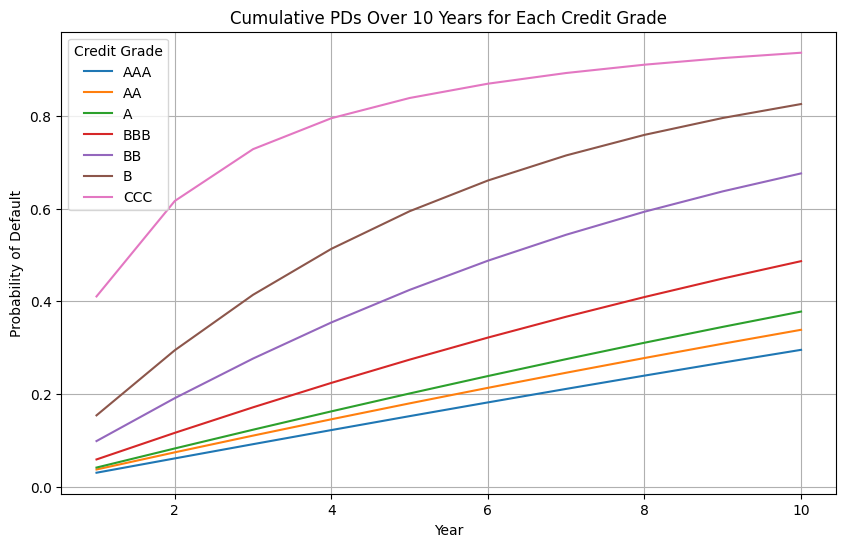

In [6]:
plt.figure(figsize=(10, 6))
for grade in states[:-1]:  # I excluded 'D' since it is always 1
    plt.plot(pd_yearly.index, pd_yearly[grade], label=grade)

plt.title("Cumulative PDs Over 10 Years for Each Credit Grade")
plt.xlabel("Year")
plt.ylabel("Probability of Default")
plt.legend(title="Credit Grade")
plt.grid()
plt.show()

# Estimation of PiT-PD model
- Estimate a macro economic model using the < Default rate > as target variable and the < Hist. Macroeconomic Data > as explanatory variables with a regression model
- Discuss the explanatory variables in your model and the output of the test statistics you receive
  - Are the signs of the parameters economically plausible
  - Test for normality of the residuals graphically
  - Show Fitted values vs. default rate historically


### Estimate a macro economic model using the < Default rate > as target variable and the < Hist. Macroeconomic Data > as explanatory variables with a regression model

In [14]:
Corporate_Default_Rate = 'Corporate Default Rate'
target_variable = pd.read_excel(file_path, sheet_name=Corporate_Default_Rate, engine='openpyxl', header=0, index_col=0)
target_variable = target_variable[['Global Corporate Default Rate']]
target_variable.head(5)

,Global Corporate Default Rate
Year,
2000,2.48
2001,3.77
2002,3.60
2003,1.93
2004,0.78


In [16]:
target_variable.describe()

,Global Corporate Default Rate
count,24.000000
mean,1.596250
std,1.065563
min,0.370000
25%,0.830000
50%,1.210000
75%,1.970000
max,4.190000


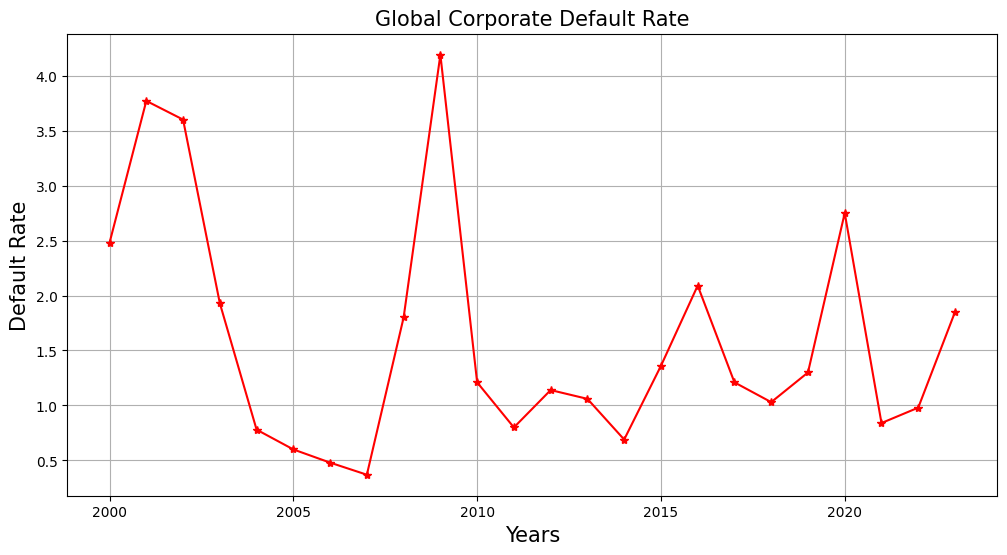

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(target_variable, color = 'red', marker='*')
plt.title("Global Corporate Default Rate", size = (15))
plt.xlabel("Years", size = (15))
plt.ylabel("Default Rate", size = (15))
plt.grid(True)

In [20]:
Historic_Data = 'Historic Data'
explanatory_variables = pd.read_excel(file_path, sheet_name=Historic_Data, engine='openpyxl', header=0, index_col=0)
explanatory_variables.index.name = 'Year'
columns_to_drop = ['Labor Markets: Unemployment rate, (%, SA)', 'National Accounts: Real Gross Domestic Product [GDP] - Market exchange rate, (Bil. 2012 USD, CDASAAR)',
                                 'Interest Rate: EURIBOR - 3-Month, (% p.a., NSA)', 'Interest Rates: Central government bond yield curve - All bond ratings total - Spot rate - 10 year maturity, (% p.a., NSA)',
                                 'Consumer Price Index: EU Harmonized - Total, (Index 2015=100, SA)']
explanatory_variables_cleaned = explanatory_variables.drop(columns=columns_to_drop)

explanatory_variables_cleaned.head()

,GDP growth rate,"Yield Structure, long-term - short-term (%)",CPI rate,Unemployment rate
Year,,,,
2000,NaN,0.010471,NaN,0.095546
2001,0.022191,0.007655,0.024147,0.087432
2002,0.009581,0.016043,0.022671,0.089650
2003,0.007340,0.018274,0.021216,0.093634
2004,0.020486,0.020341,0.021762,0.094083


In [22]:
explanatory_variables_cleaned.describe()

,GDP growth rate,"Yield Structure, long-term - short-term (%)",CPI rate,Unemployment rate
count,23.000000,24.000000,23.000000,24.000000
mean,0.014960,0.012397,0.022771,0.093737
std,0.028925,0.012706,0.021271,0.015815
min,-0.065798,-0.024629,0.001901,0.065000
25%,0.008461,0.007125,0.012896,0.084078
50%,0.018106,0.012418,0.021646,0.093634
75%,0.024842,0.019266,0.024402,0.104884
max,0.082791,0.030774,0.084000,0.124822


In [24]:
merged_data = pd.merge(target_variable/100, explanatory_variables_cleaned, on='Year')
merged_data.head()

,Global Corporate Default Rate,GDP growth rate,"Yield Structure, long-term - short-term (%)",CPI rate,Unemployment rate
Year,,,,,
2000,0.0248,NaN,0.010471,NaN,0.095546
2001,0.0377,0.022191,0.007655,0.024147,0.087432
2002,0.0360,0.009581,0.016043,0.022671,0.089650
2003,0.0193,0.007340,0.018274,0.021216,0.093634
2004,0.0078,0.020486,0.020341,0.021762,0.094083


In [26]:
merged_data.describe()

,Global Corporate Default Rate,GDP growth rate,"Yield Structure, long-term - short-term (%)",CPI rate,Unemployment rate
count,24.000000,23.000000,24.000000,23.000000,24.000000
mean,0.015963,0.014960,0.012397,0.022771,0.093737
std,0.010656,0.028925,0.012706,0.021271,0.015815
min,0.003700,-0.065798,-0.024629,0.001901,0.065000
25%,0.008300,0.008461,0.007125,0.012896,0.084078
50%,0.012100,0.018106,0.012418,0.021646,0.093634
75%,0.019700,0.024842,0.019266,0.024402,0.104884
max,0.041900,0.082791,0.030774,0.084000,0.124822


### Checking stationarity

In [38]:
from statsmodels.tsa.stattools import adfuller

for column in merged_data.columns:
    print(f"ADF Test for: {column}")
    result = adfuller(merged_data[column].dropna())
    adf_statistic = result[0]
    p_value = result[1]
    print(f"ADF Statistic: {adf_statistic}")
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print("Stationary: Yes(p-value < 0.05)\n")
    else:
        print("Stationary: No (p-value >= 0.05)\n")

ADF Test for: Global Corporate Default Rate
ADF Statistic: -4.068231993556187
p-value: 0.0010924895318202954
Stationary: Yes(p-value < 0.05)

ADF Test for: GDP growth rate
ADF Statistic: -3.8951404629095565
p-value: 0.002070903126683524
Stationary: Yes(p-value < 0.05)

ADF Test for: Yield Structure, long-term - short-term (%)
ADF Statistic: -0.5264389829271127
p-value: 0.8867530280410194
Stationary: No (p-value >= 0.05)

ADF Test for: CPI rate
ADF Statistic: -2.719822221141259
p-value: 0.07067051989901493
Stationary: No (p-value >= 0.05)

ADF Test for: Unemployment rate
ADF Statistic: -2.1032478144499325
p-value: 0.2432106461107837
Stationary: No (p-value >= 0.05)

ADF Test for: Yield Structure Diff
ADF Statistic: -3.2062270298509774
p-value: 0.019627051908161507
Stationary: Yes(p-value < 0.05)

ADF Test for: CPI Rate Diff
ADF Statistic: -1.6311006335524414
p-value: 0.4669146501942326
Stationary: No (p-value >= 0.05)

ADF Test for: Unemployment Rate Diff
ADF Statistic: -1.9301926070961

In [40]:
merged_data['Yield Structure Diff'] = merged_data['Yield Structure, long-term - short-term (%)'].diff()
merged_data['CPI Rate Diff'] = merged_data['CPI rate'].diff()
merged_data['Unemployment Rate Diff'] = merged_data['Unemployment rate'].diff()


In [42]:
#Checking stationarity for remaining non-stationarity variables
for column in ['Yield Structure Diff', 'CPI Rate Diff', 'Unemployment Rate Diff']:
    result = adfuller(merged_data[column].dropna())
    print(column, ": ADF Statistic =", result[0], ", p-value =", result[1])


Yield Structure Diff : ADF Statistic = -3.2062270298509774 , p-value = 0.019627051908161507
CPI Rate Diff : ADF Statistic = -1.6311006335524414 , p-value = 0.4669146501942326
Unemployment Rate Diff : ADF Statistic = -1.930192607096194 , p-value = 0.3179935411648094


In [44]:
merged_data['CPI Rate Second Diff'] = merged_data['CPI Rate Diff'].diff()
merged_data['Unemployment Rate Second Diff'] = merged_data['Unemployment Rate Diff'].diff()


In [50]:

for column in ['CPI Rate Second Diff', 'Unemployment Rate Second Diff']:
    result = adfuller(merged_data[column].dropna())
    print(column, ": ADF Statistic =", result[0], ", p-value =", result[1])


CPI Rate Second Diff : ADF Statistic = -4.09294916241163 , p-value = 0.0009948443344518238
Unemployment Rate Second Diff : ADF Statistic = -3.3898824743627896 , p-value = 0.011308650940405516


In [52]:
import statsmodels.api as sm

# Preparing data for regression
X = merged_data[['GDP growth rate', 'Yield Structure Diff', 
                 'CPI Rate Second Diff', 'Unemployment Rate Second Diff']].dropna()
y = merged_data['Global Corporate Default Rate'].loc[X.index]

# Adding a constant to the model
X = sm.add_constant(X)

# Fitting OLS model
model = sm.OLS(y, X).fit()

# Summary of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Global Corporate Default Rate   R-squared:                       0.682
Model:                                       OLS   Adj. R-squared:                  0.602
Method:                            Least Squares   F-statistic:                     8.575
Date:                           Wed, 22 Jan 2025   Prob (F-statistic):           0.000677
Time:                                   00:47:49   Log-Likelihood:                 82.212
No. Observations:                             21   AIC:                            -154.4
Df Residuals:                                 16   BIC:                            -149.2
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0150      0.001     10.815      0.000       0.012       0.018
GDP growth rate                  -0.0570      0.054     -1.061      0.304      -0.171       0.057
Yield Structure Diff              0.2571      0.165      1.555      0.139      -0.093       0.607
CPI Rate Second Diff              0.0143      0.090      0.158      0.876      -0.178       0.206
Unemployment Rate Second Diff     0.5598      0.247      2.269      0.037       0.037       1.083
==============================================================================
Omnibus:                        0.506   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.777   Jarque-Bera (JB):                0.592
Skew:                          -0.141   Prob(JB):                        0.744
Kurtosis:                       2.228   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Adding squared terms for GDP growth rate and Yield Structure Diff
merged_data['GDP growth rate squared'] = merged_data['GDP growth rate'] ** 2
merged_data['Yield Structure Diff Squared'] = merged_data['Yield Structure Diff'] ** 2

# Refitting the model with the new terms
X = merged_data[['GDP growth rate squared','Yield Structure Diff Squared', 'CPI Rate Second Diff',
                 'Unemployment Rate Second Diff']].dropna()

X = sm.add_constant(X)
y = merged_data['Global Corporate Default Rate'].loc[X.index]

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Global Corporate Default Rate   R-squared:                       0.729
Model:                                       OLS   Adj. R-squared:                  0.662
Method:                            Least Squares   F-statistic:                     10.78
Date:                           Wed, 22 Jan 2025   Prob (F-statistic):           0.000196
Time:                                   00:48:16   Log-Likelihood:                 83.911
No. Observations:                             21   AIC:                            -157.8
Df Residuals:                                 16   BIC:                            -152.6
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0116      0.001      7.888      0.000       0.009       0.015
GDP growth rate squared           0.0740      0.779      0.095      0.925      -1.577       1.725
Yield Structure Diff Squared     22.1673      6.997      3.168      0.006       7.334      37.001
CPI Rate Second Diff              0.1928      0.084      2.303      0.035       0.015       0.370
Unemployment Rate Second Diff     0.7380      0.199      3.707      0.002       0.316       1.160
==============================================================================
Omnibus:                        0.662   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.680
Skew:                           0.352   Prob(JB):                        0.712
Kurtosis:                       2.468   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#Since GDP growth rate doesn't provide statistically significant result I drop it 
merged_data['Yield Structure Diff Squared'] = merged_data['Yield Structure Diff'] ** 2

X = merged_data[['Yield Structure Diff Squared', 'CPI Rate Second Diff',
                 'Unemployment Rate Second Diff']].dropna()

X = sm.add_constant(X)
y = merged_data['Global Corporate Default Rate'].loc[X.index]

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Global Corporate Default Rate   R-squared:                       0.729
Model:                                       OLS   Adj. R-squared:                  0.682
Method:                            Least Squares   F-statistic:                     15.27
Date:                           Wed, 22 Jan 2025   Prob (F-statistic):           4.48e-05
Time:                                   00:49:15   Log-Likelihood:                 83.906
No. Observations:                             21   AIC:                            -159.8
Df Residuals:                                 17   BIC:                            -155.6
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0117      0.001      9.439      0.000       0.009       0.014
Yield Structure Diff Squared     22.2950      6.664      3.346      0.004       8.236      36.355
CPI Rate Second Diff              0.1916      0.080      2.385      0.029       0.022       0.361
Unemployment Rate Second Diff     0.7398      0.192      3.847      0.001       0.334       1.146
==============================================================================
Omnibus:                        0.692   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.676
Skew:                           0.366   Prob(JB):                        0.713
Kurtosis:                       2.513   Cond. No.                     6.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Using the mean as a representative value
mean_value = merged_data['Yield Structure Diff Squared'].mean()
coefficient = 22.2950
# Impact calculation
impact = coefficient * mean_value
print(f"Impact of Yield Structure Diff Squared on Default Rate: {impact}")

Impact of Yield Structure Diff Squared on Default Rate: 0.0018958983318619785


In [62]:
#Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = merged_data[['Yield Structure Diff Squared', 'CPI Rate Second Diff', 'Unemployment Rate Second Diff']].dropna()
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                        Variable       VIF
0                          const  1.316523
1   Yield Structure Diff Squared  1.757920
2           CPI Rate Second Diff  2.675620
3  Unemployment Rate Second Diff  2.480488


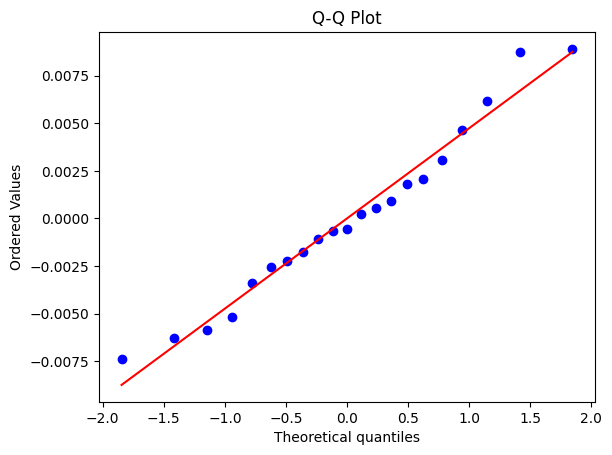

In [64]:
import matplotlib.pyplot as plt
import scipy.stats as stats

residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


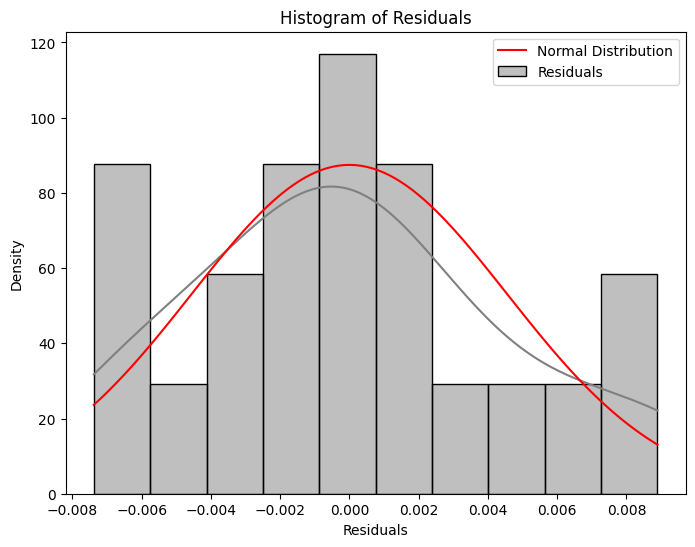

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Extracting residuals from the model
residuals = model.resid

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, stat="density", bins=10, color='gray', label='Residuals')

# Adding a normal distribution curve
mean = residuals.mean()
std = residuals.std()
x = np.linspace(residuals.min(), residuals.max(), 100)
normal_curve = stats.norm.pdf(x, mean, std)
plt.plot(x, normal_curve, color='red', label='Normal Distribution')

# Adding labels and legend
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()


In [70]:
#Diagnostic Tests for Residuals
from scipy.stats import shapiro
print("Shapiro-Wilk Test p-value:", shapiro(residuals)[1])


Shapiro-Wilk Test p-value: 0.6388465013445903


In [72]:
from statsmodels.stats.diagnostic import het_breuschpagan
#Checking Homoscedasticity  
_, pval, _, _ = het_breuschpagan(residuals, model.model.exog)
print("Breusch-Pagan Test p-value:", pval)


Breusch-Pagan Test p-value: 0.18842143681630663


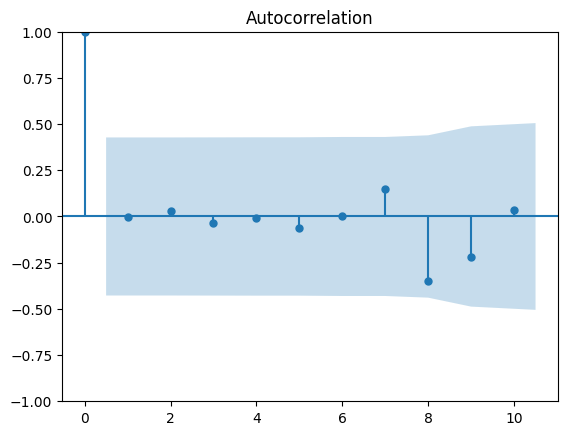

In [74]:
from statsmodels.graphics.tsaplots import plot_acf
#ACF Plot for Residuals
plot_acf(residuals)
plt.show()


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
#Model Validation
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation RMSE:", np.sqrt(-scores.mean()))


Cross-Validation RMSE: 0.0060127679907787885


In [78]:
#Comparing RMSE to Standard Deviation
std_dev = y.std()
print("Standard Deviation of Dependent Variable:", std_dev)


Standard Deviation of Dependent Variable: 0.008767475066837605


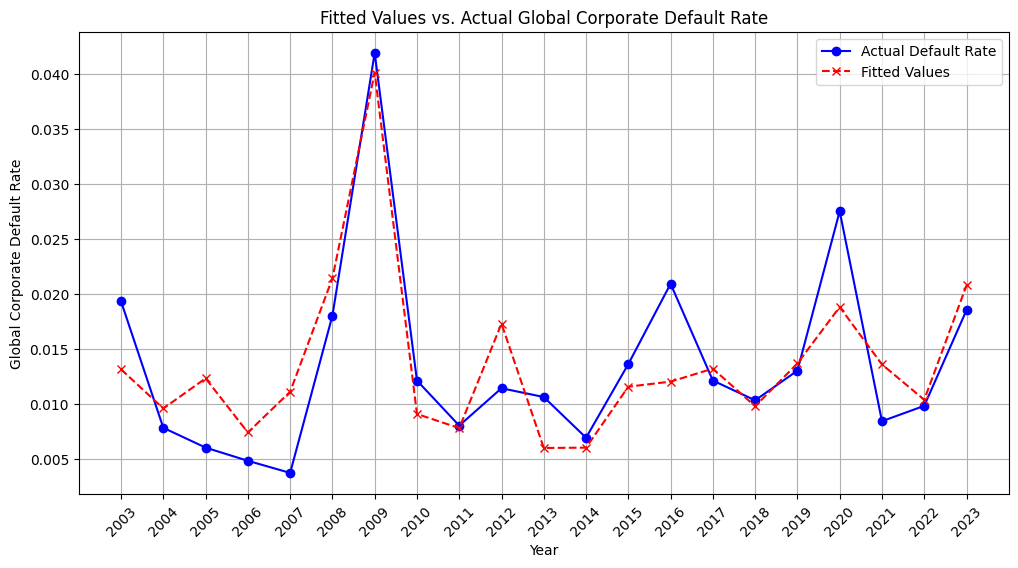

In [80]:
import matplotlib.pyplot as plt

fitted_values = model.fittedvalues
actual_values = y
years = actual_values.index.astype(int)

# Plotting actual vs. fitted values
plt.figure(figsize=(12, 6))
plt.plot(years, actual_values, label="Actual Default Rate", color="blue", marker='o')
plt.plot(years, fitted_values, label="Fitted Values", color="red", linestyle='--', marker='x')
plt.title("Fitted Values vs. Actual Global Corporate Default Rate")
plt.xlabel("Year")
plt.ylabel("Global Corporate Default Rate")
plt.xticks(years, rotation=45)  # Rotate the x-axis labels if needed
plt.legend()
plt.grid()
plt.show()


# Apply your modeled shift factor on the TTC Lifetime PDs to get PiT Lifetime PDs (show the difference graphically for each grade) with the given predictions in < Fore. Macroeconomic Data >. Describe your observations.

### Forecasting baseline scenario

In [82]:
#I just change names of forecast data in sheet name for different scenarios (baseline, optimistic, pessimistic) 
forecast_data = pd.read_excel(file_path, sheet_name="Forecast Data (Baseline)", engine="openpyxl")
forecast_data.head()

,Description:,"Labor Markets: Unemployment rate, (%, SA)","Consumer Price Index: EU Harmonized - Total, (Index 2015=100, SA)","National Accounts: Real Gross Domestic Product [GDP] - Market exchange rate, (Bil. 2012 USD, CDASAAR)","Interest Rate: EURIBOR - 3-Month, (% p.a., NSA)","Interest Rates: Central government bond yield curve - All bond ratings total - Spot rate - 10 year maturity, (% p.a., NSA)",GDP growth rate,"Yield Structure, long-term - short-term (%)",CPI rate,Unemployment rate
0,2024,6.9,124.196536,15632.634300,2.91,2.62,0.005,-0.0029,0.063,0.069
1,2025,6.8,128.419218,15929.654352,2.71,2.66,0.019,-0.0005,0.034,0.068
2,2026,6.6,131.372860,16216.388130,2.47,2.74,0.018,0.0027,0.023,0.066


In [86]:
# Since I set the coefficent for Yield structure 0.19 (I rounded it) instead of 22.29, I have to change it from the parameters again

model.params["Yield Structure Diff Squared"] = 0.19

# Verifying the change
print(model.params)


const                            0.011694
Yield Structure Diff Squared     0.190000
CPI Rate Second Diff             0.191577
Unemployment Rate Second Diff    0.739794
dtype: float64


In [88]:
# Selecting features matching the model
forecast_features = forecast_data[["Yield Structure, long-term - short-term (%)", 
                                   "CPI rate", 
                                   "Unemployment rate"]]
# Adding a constant to forecast_features to match the model
forecast_features = sm.add_constant(forecast_features, has_constant="add")
forecast_features

,const,"Yield Structure, long-term - short-term (%)",CPI rate,Unemployment rate
0,1.0,-0.0029,0.063,0.069
1,1.0,-0.0005,0.034,0.068
2,1.0,0.0027,0.023,0.066


In [90]:
# Using the regression model to predict default rates (DR_t+h)
predicted_dr = model.predict(forecast_features)
forecast_data["Predicted_DR"] = predicted_dr
# Computing the average default rate (Central Tendency)
average_dr = predicted_dr.mean()

print("predicted_dr:", predicted_dr)
print("average_dr:", average_dr)


predicted_dr: 0    0.074258
1    0.068419
2    0.065440
dtype: float64
average_dr: 0.06937224282327518


In [92]:
# Calculating the Shift Factor
forecast_data["ShiftFactor"] = forecast_data["Predicted_DR"] / average_dr
forecast_data["ShiftFactor"]

0    1.070431
1    0.986255
2    0.943314
Name: ShiftFactor, dtype: float64

In [94]:
#Let's remember TTC again
TTC

,Credit Rating,10-Year PD
0,AAA,0.295564
1,AA,0.338747
2,A,0.378027
3,BBB,0.486635
4,BB,0.675718
5,B,0.825170
6,CCC,0.935752
7,D,1.000000


In [96]:
# Using the previously calculated 10-Year TTC PDs for each grade
ttc_pds = pd.Series(
    [0.295564, 0.338747, 0.378027, 0.486635, 0.675718, 0.825170, 0.935752],
    index=["AAA", "AA", "A", "BBB", "BB", "B", "CCC"] #I remove D since it is always 1
)

# Calculating PiT Lifetime PDs for each grade
pit_pds = pd.DataFrame()
for grade in ttc_pds.index:
    pit_pds[grade] = ttc_pds[grade] * forecast_data["ShiftFactor"]
pit_pds = pit_pds.clip(upper=1)


pit_pds.index = [2024, 2025, 2026]
pit_pds.index.name = "Years"

In [98]:
pit_pds

,AAA,AA,A,BBB,BB,B,CCC
Years,,,,,,,
2024,0.316381,0.362605,0.404652,0.520909,0.723310,0.883288,1.000000
2025,0.291501,0.334091,0.372831,0.479946,0.666430,0.813828,0.922890
2026,0.278810,0.319545,0.356598,0.459049,0.637414,0.778394,0.882708


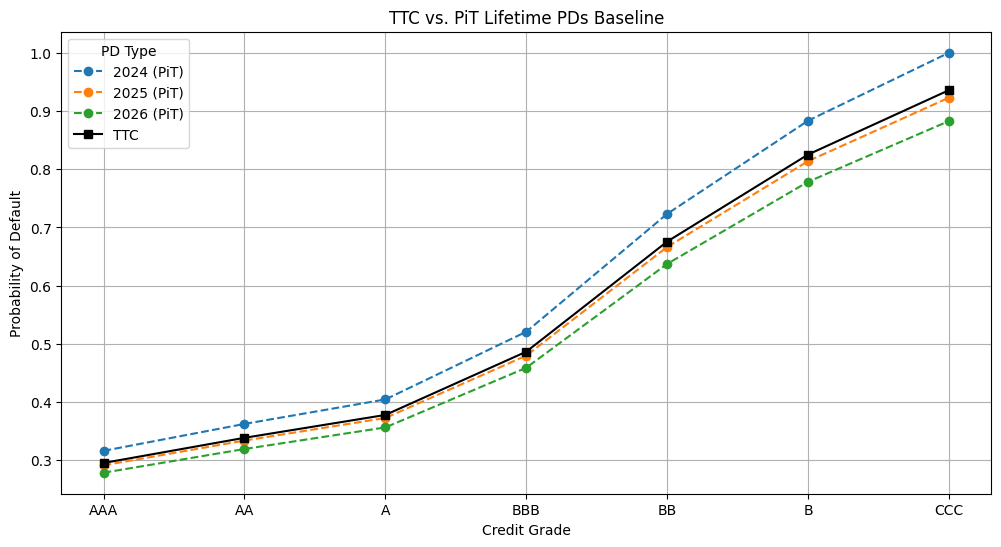

In [100]:
import matplotlib.pyplot as plt

# Plotting PiT and TTC Lifetime PDs for each grade
plt.figure(figsize=(12, 6))

grades = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC"]

# Plotting PiT Lifetime PDs for each forecast year
for year in pit_pds.index:
    plt.plot(grades, pit_pds.loc[year], label=f"{year} (PiT)", linestyle='--', marker='o')

# Plotting TTC Lifetime PDs
plt.plot(grades, ttc_pds.values, label="TTC", linestyle='-', marker='s', color='black')

# Customizing the plot
plt.title("TTC vs. PiT Lifetime PDs Baseline")
plt.xlabel("Credit Grade")
plt.ylabel("Probability of Default")
plt.legend(title="PD Type")
plt.grid(True)
plt.show()


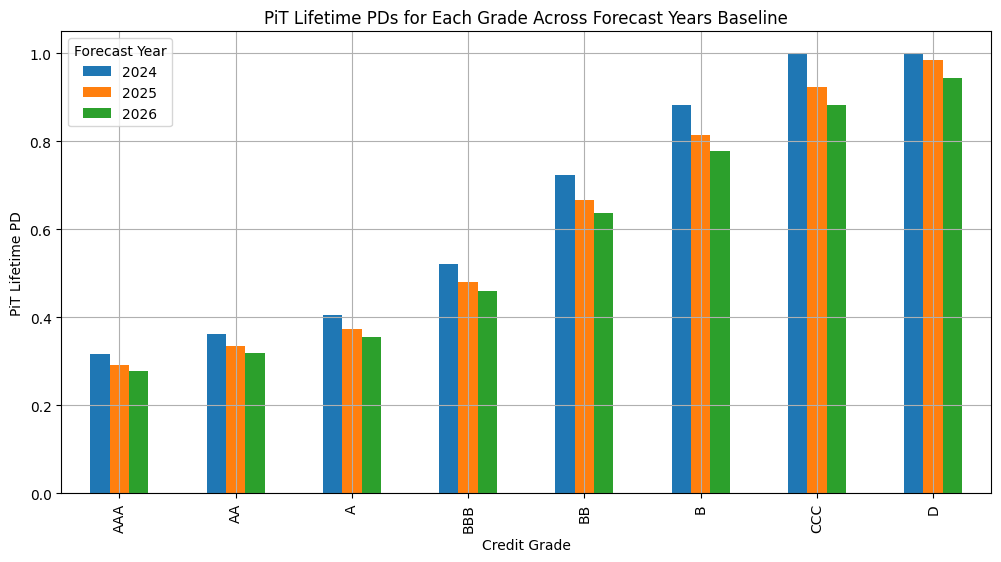

In [956]:
import matplotlib.pyplot as plt

# Transposing the DataFrame for easier plotting
pit_pds_transposed = pit_pds.T

# Plotting the PiT Lifetime PDs for each forecast year
pit_pds_transposed.plot(kind='bar', figsize=(12, 6))
plt.title("PiT Lifetime PDs for Each Grade Across Forecast Years Baseline")
plt.xlabel("Credit Grade")
plt.ylabel("PiT Lifetime PD")
plt.legend(title="Forecast Year", loc='upper left')
plt.grid()
plt.show()


In [1171]:
forecast_data = pd.read_excel(file_path, sheet_name="Forecast Data (Optimistic)", engine="openpyxl")
forecast_features = forecast_data[["Yield Structure, long-term - short-term (%)", 
                                   "CPI rate", 
                                   "Unemployment rate"]]
forecast_features = sm.add_constant(forecast_features, has_constant="add")
model.params["Yield Structure Diff Squared"] = 0.19
predicted_dr = model.predict(forecast_features)
forecast_data["Predicted_DR"] = predicted_dr
average_dr = predicted_dr.mean()
forecast_data["ShiftFactor"] = forecast_data["Predicted_DR"] / average_dr
ttc_pds = pd.Series(
    [0.295564, 0.338747, 0.378027, 0.486635, 0.675718, 0.825170, 0.935752],
    index=["AAA", "AA", "A", "BBB", "BB", "B", "CCC"]
)
pit_pds = pd.DataFrame()
for grade in ttc_pds.index:
    pit_pds[grade] = ttc_pds[grade] * forecast_data["ShiftFactor"]
pit_pds = pit_pds.clip(upper=1)
pit_pds = pd.DataFrame()
for grade in ttc_pds.index:
    pit_pds[grade] = ttc_pds[grade] * forecast_data["ShiftFactor"]
pit_pds = pit_pds.clip(upper=1)
pit_pds.index = [2024, 2025, 2026]
pit_pds.index.name = "Years"

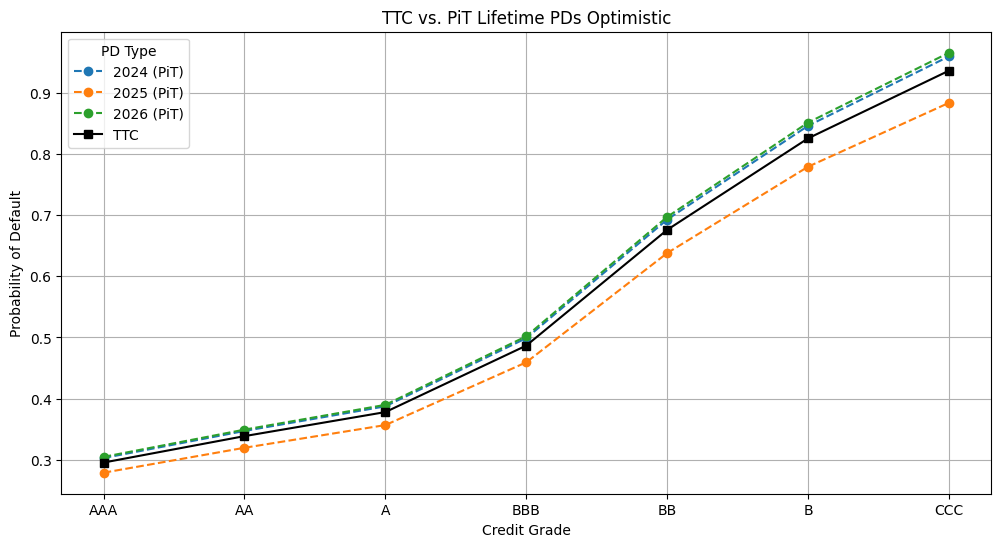

In [1175]:
import matplotlib.pyplot as plt

# Plotting PiT and TTC Lifetime PDs for each grade
plt.figure(figsize=(12, 6))

grades = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC"]

# Plotting PiT Lifetime PDs for each forecast year
for year in pit_pds.index:
    plt.plot(grades, pit_pds.loc[year], label=f"{year} (PiT)", linestyle='--', marker='o')

# Plotting TTC Lifetime PDs
plt.plot(grades, ttc_pds.values, label="TTC", linestyle='-', marker='s', color='black')

# Customizing the plot
plt.title("TTC vs. PiT Lifetime PDs Optimistic")
plt.xlabel("Credit Grade")
plt.ylabel("Probability of Default")
plt.legend(title="PD Type")
plt.grid(True)
plt.show()


In [1177]:
forecast_data = pd.read_excel(file_path, sheet_name="Forecast Data (Pessimistic)", engine="openpyxl")
forecast_features = forecast_data[["Yield Structure, long-term - short-term (%)", 
                                   "CPI rate", 
                                   "Unemployment rate"]]
forecast_features = sm.add_constant(forecast_features, has_constant="add")
model.params["Yield Structure Diff Squared"] = 0.19
predicted_dr = model.predict(forecast_features)
forecast_data["Predicted_DR"] = predicted_dr
average_dr = predicted_dr.mean()
forecast_data["ShiftFactor"] = forecast_data["Predicted_DR"] / average_dr
ttc_pds = pd.Series(
    [0.295564, 0.338747, 0.378027, 0.486635, 0.675718, 0.825170, 0.935752],
    index=["AAA", "AA", "A", "BBB", "BB", "B", "CCC"]
)
pit_pds = pd.DataFrame()
for grade in ttc_pds.index:
    pit_pds[grade] = ttc_pds[grade] * forecast_data["ShiftFactor"]
pit_pds = pit_pds.clip(upper=1)
pit_pds = pd.DataFrame()
for grade in ttc_pds.index:
    pit_pds[grade] = ttc_pds[grade] * forecast_data["ShiftFactor"]
pit_pds = pit_pds.clip(upper=1)
pit_pds.index = [2024, 2025, 2026]
pit_pds.index.name = "Years"

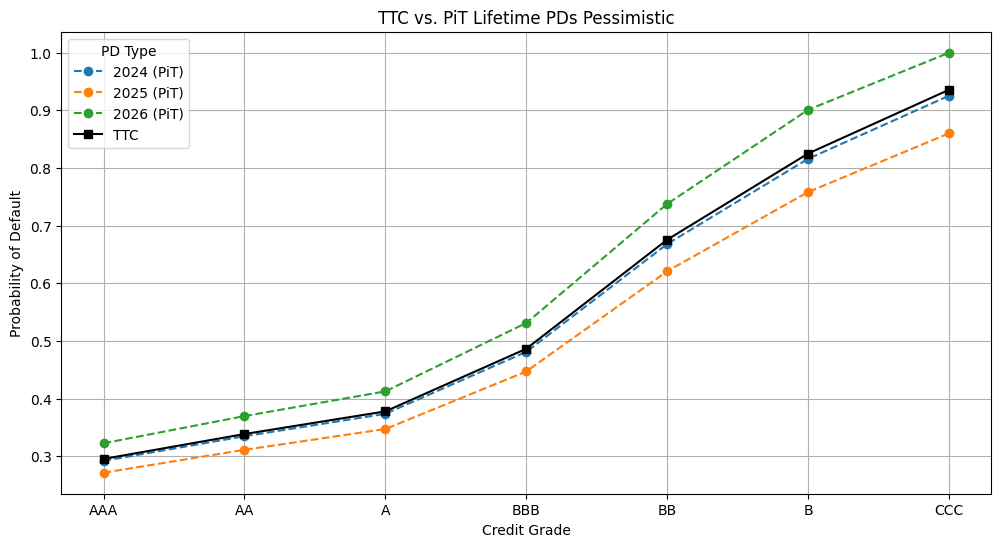

In [1179]:
import matplotlib.pyplot as plt

# Plotting PiT and TTC Lifetime PDs for each grade
plt.figure(figsize=(12, 6))

grades = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC"]

# Plotting PiT Lifetime PDs for each forecast year
for year in pit_pds.index:
    plt.plot(grades, pit_pds.loc[year], label=f"{year} (PiT)", linestyle='--', marker='o')

# Plotting TTC Lifetime PDs
plt.plot(grades, ttc_pds.values, label="TTC", linestyle='-', marker='s', color='black')

# Customizing the plot
plt.title("TTC vs. PiT Lifetime PDs Pessimistic")
plt.xlabel("Credit Grade")
plt.ylabel("Probability of Default")
plt.legend(title="PD Type")
plt.grid(True)
plt.show()
